<a href="https://colab.research.google.com/github/Doclikam/machine-learning-I/blob/main/chips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
semiconductors=pd.read_csv('/content/chip_dataset (5).csv')

In [ ]:
semiconductors.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
semiconductors.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [ ]:
semiconductors.shape

(4854, 14)

In [ ]:
semiconductors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

# **Getting the missing values**

In [ ]:
missing_data=semiconductors.isnull().sum().sort_values(ascending=False)
missing_data

FP16 GFLOPS              4318
FP64 GFLOPS              3548
FP32 GFLOPS              2906
Die Size (mm^2)           715
Transistors (million)     711
TDP (W)                   626
Process Size (nm)           9
Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Freq (MHz)                  0
Foundry                     0
Vendor                      0
dtype: int64

In [ ]:
missing_percentage=100*semiconductors.isnull().sum().sort_values(ascending=False)/len(semiconductors)

In [ ]:
missing_percentage

FP16 GFLOPS              88.957561
FP64 GFLOPS              73.094355
FP32 GFLOPS              59.868150
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
TDP (W)                  12.896580
Process Size (nm)         0.185414
Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Release Date              0.000000
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
dtype: float64

In [ ]:
categorical_cols=semiconductors.select_dtypes(include='object').columns

In [ ]:
semiconductors[categorical_cols]=semiconductors[categorical_cols].fillna(semiconductors[categorical_cols].mode())

In [ ]:
numerical_cols=semiconductors.select_dtypes(include='float').columns

In [ ]:
semiconductors[numerical_cols]=semiconductors[numerical_cols].fillna(semiconductors[numerical_cols].mode())

In [ ]:
semiconductors.isnull().sum()

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4317
FP32 GFLOPS              2905
FP64 GFLOPS              3547
dtype: int64

# **Dropping non-consequential fields**

In [ ]:
semiconductors.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,768.0,384.0,96.0
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
semiconductors.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [ ]:
semiconductors.drop(columns=['Unnamed: 0','Product'], inplace=True)

# **Transform temporal data to their corrrect format (date time)**

In [ ]:
semiconductors['Release Date']=pd.to_datetime(semiconductors['Release Date'])

In [ ]:
semiconductors.dtypes

Type                             object
Release Date             datetime64[ns]
Process Size (nm)               float64
TDP (W)                         float64
Die Size (mm^2)                 float64
Transistors (million)           float64
Freq (MHz)                      float64
Foundry                          object
Vendor                           object
FP16 GFLOPS                     float64
FP32 GFLOPS                     float64
FP64 GFLOPS                     float64
dtype: object

# **Moore's Law still holds, especially in GPUs.**

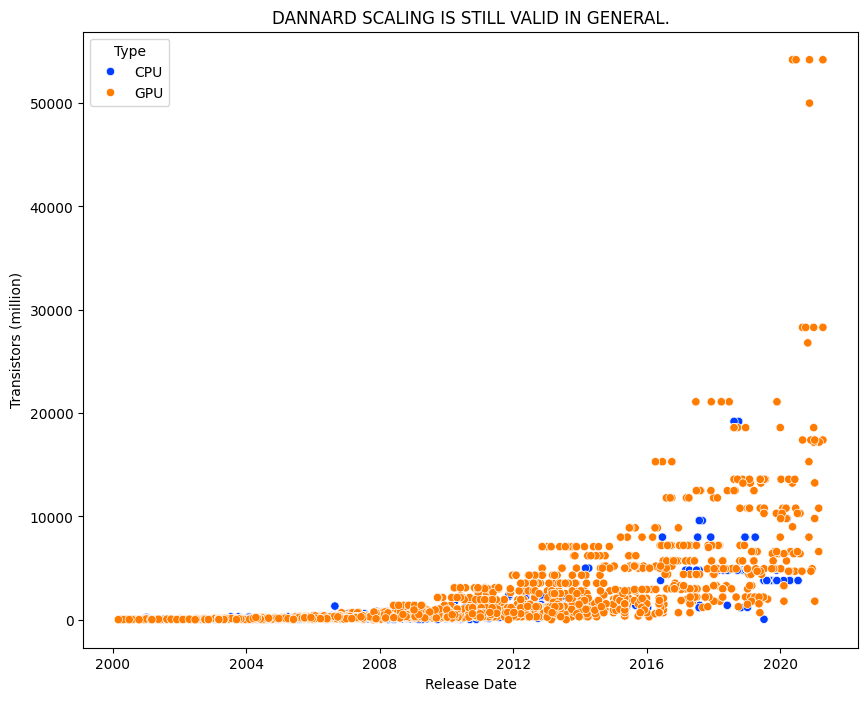

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=semiconductors, x='Release Date', hue='Type', y='Transistors (million)')
plt.title('Dannard Scaling is still valid in general.'.upper())
plt.show()

# **Dannard Scaling is still valid in general.**

In [ ]:
numerical_cols

Index(['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)',
       'Transistors (million)', 'Freq (MHz)', 'FP16 GFLOPS', 'FP32 GFLOPS',
       'FP64 GFLOPS'],
      dtype='object')

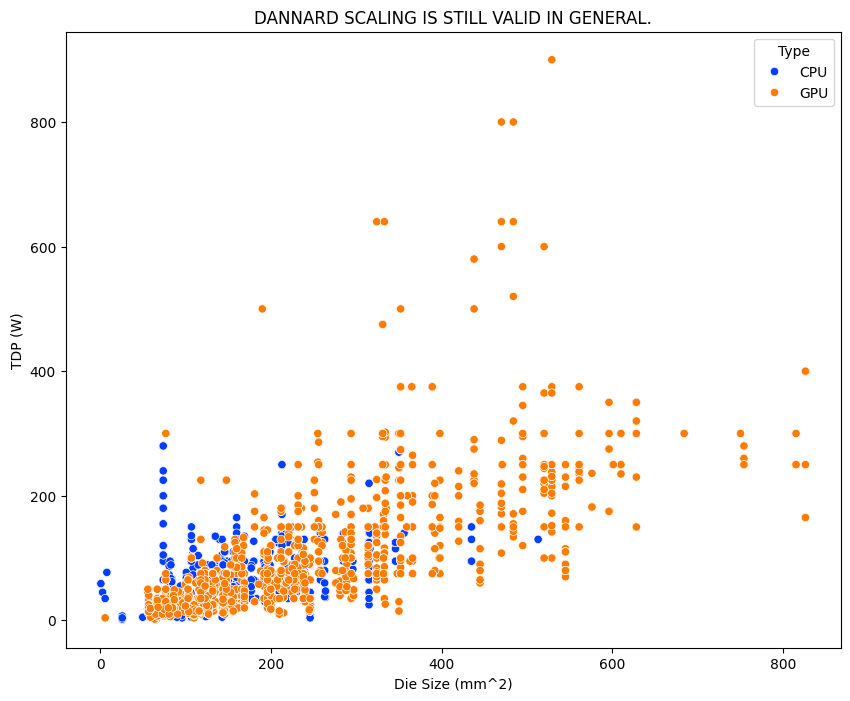

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=semiconductors, x='Die Size (mm^2)', y='TDP (W)', hue='Type')
plt.title('Dannard Scaling is still valid in general.'.upper())
plt.show()

# **CPUs have higher frequencies, but GPUs are catching up.**

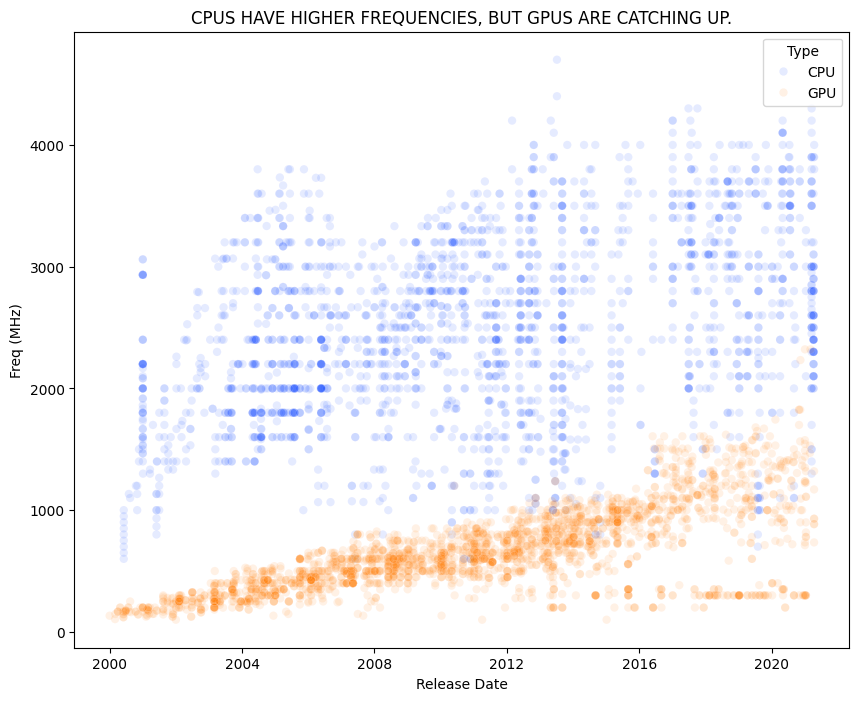

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=semiconductors, x='Release Date', y='Freq (MHz)', hue='Type', alpha=0.1)
plt.title('CPUs have higher frequencies, but GPUs are catching up.'.upper())
plt.show()

# **GPU performance doubles every 1.5 years.**

In [ ]:
gpu_chips=semiconductors[semiconductors['Type']=='GPU']

In [ ]:
gpu_chips

,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2192,GPU,2011-04-03,32.0,95.0,216.0,1160.0,100.0,Intel,Intel,NaN,NaN,NaN
2193,GPU,2002-06-25,150.0,NaN,174.0,80.0,200.0,UMC,Other,NaN,NaN,NaN
2194,GPU,2019-02-23,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,18.38,1177.0,36.77
2195,GPU,2008-03-02,130.0,NaN,NaN,NaN,200.0,Intel,Intel,NaN,12.8,NaN
2196,GPU,2008-09-30,55.0,20.0,73.0,242.0,600.0,TSMC,ATI,NaN,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4849,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.00
4850,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


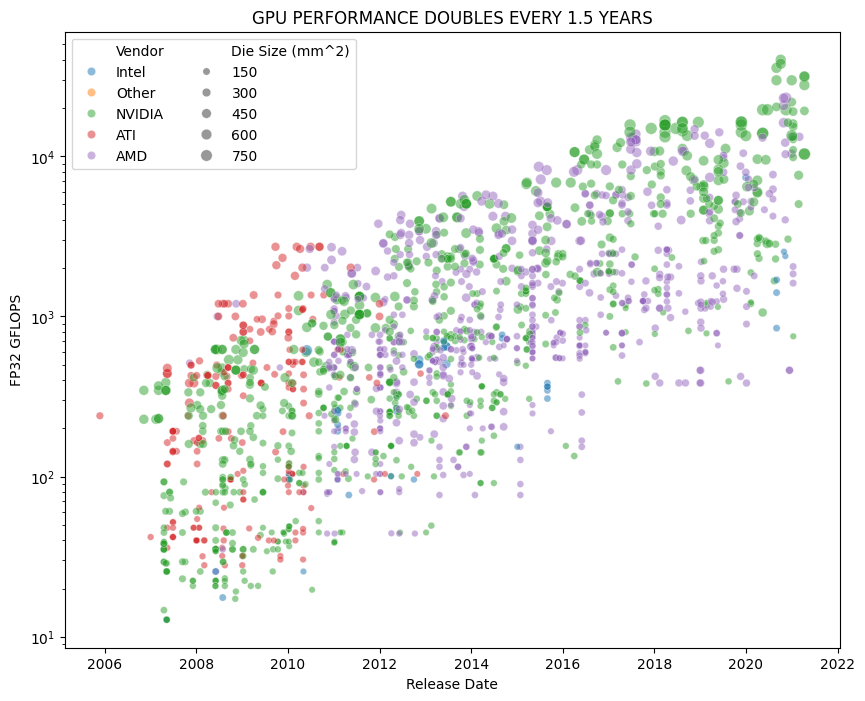

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=gpu_chips, x='Release Date', y='FP32 GFLOPS', hue='Vendor', size='Die Size (mm^2)', alpha=0.5)
plt.title('gpu performance doubles every 1.5 years'.upper())
plt.yscale('log')
plt.legend(loc=2, ncols=2)
plt.show()

# **GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.**

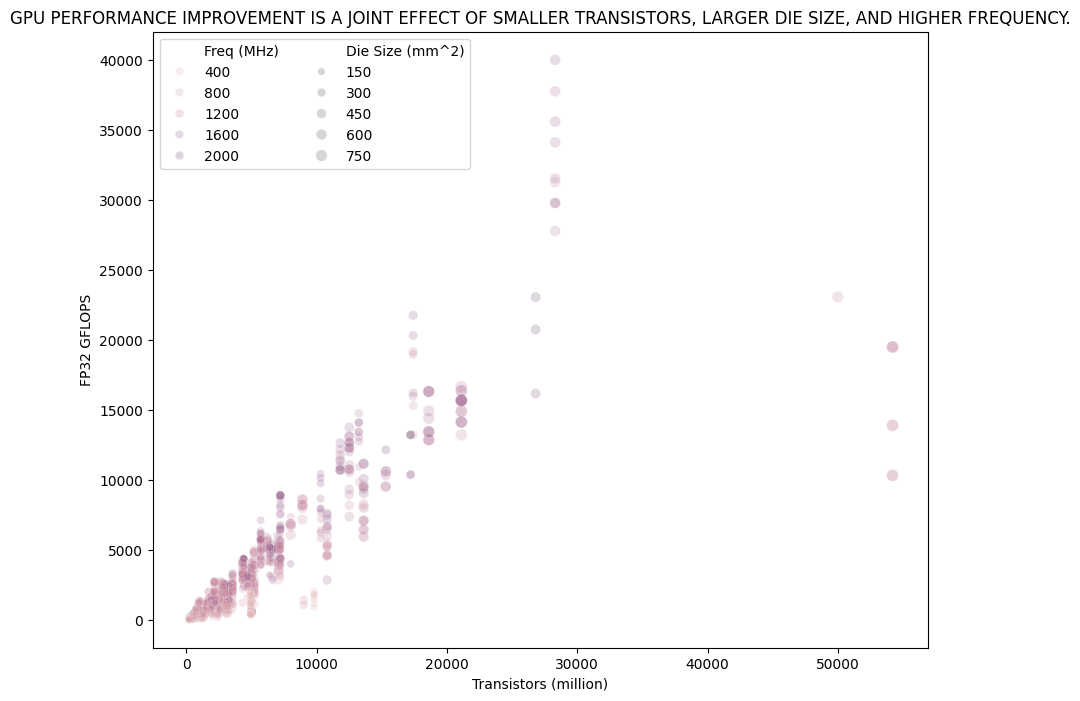

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=gpu_chips, y='FP32 GFLOPS', x='Transistors (million)', hue='Freq (MHz)', size='Die Size (mm^2)', alpha=0.2)
plt.title('GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.'.upper())
plt.legend(loc=2, ncols=2)
sns.set_palette('bright',n_colors=5)
plt.show()

## High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

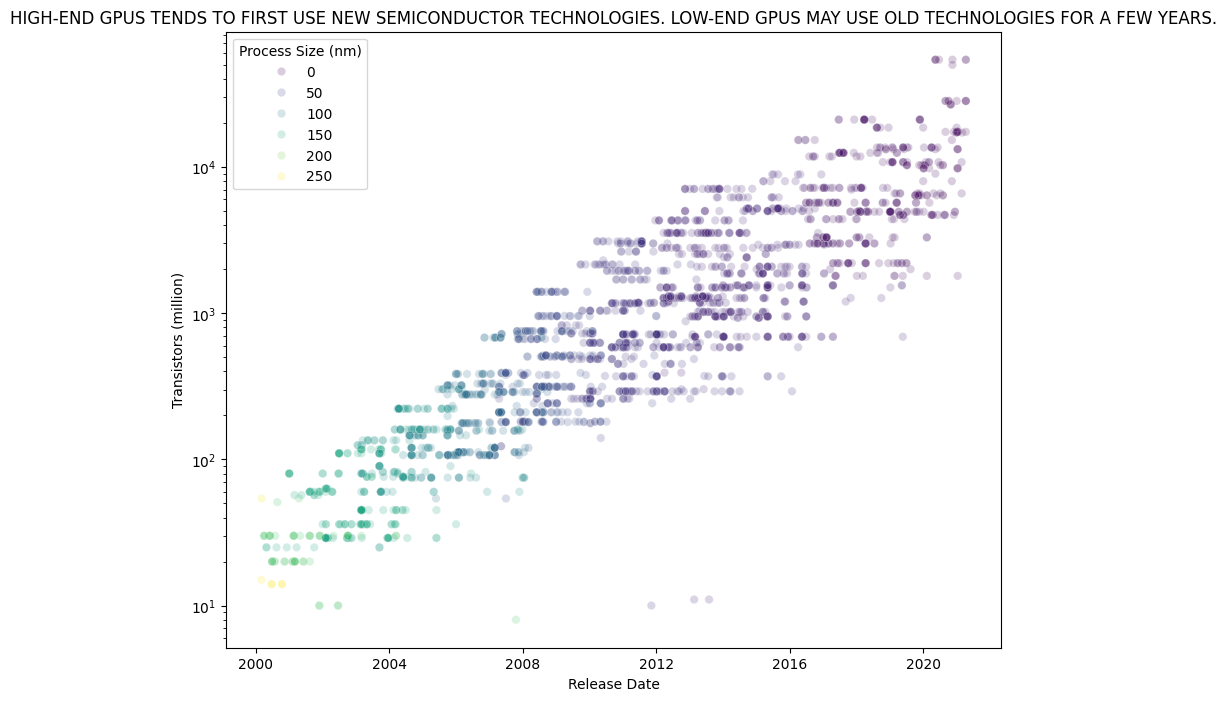

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=gpu_chips, x='Release Date', hue='Process Size (nm)', y='Transistors (million)', alpha=0.2, palette='viridis')
plt.title('High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.'.upper())
plt.yscale('log')
plt.show()

# **Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors**

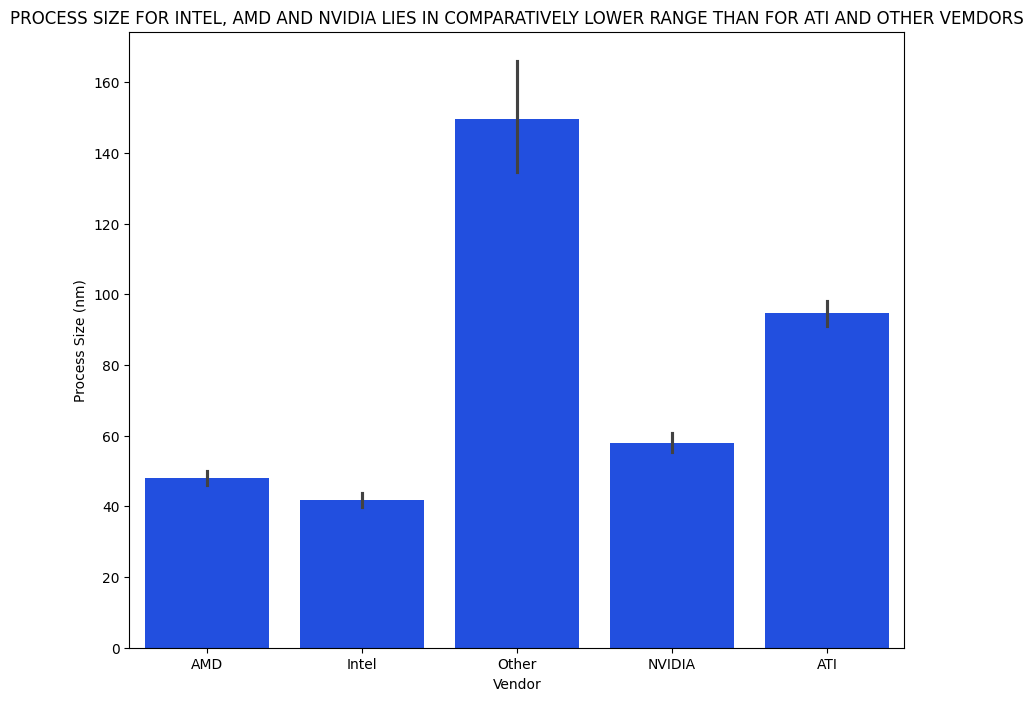

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=semiconductors, x='Vendor', y='Process Size (nm)')
plt.title('Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors'.upper())
plt.show()

# **TSMC makes the highest number of chips in the world**

In [ ]:
semiconductors['Foundry'].value_counts()

Foundry
TSMC       2178
Intel      1390
Unknown     866
GF          265
UMC          79
Samsung      60
Sony         10
IBM           3
NEC           2
Renesas       1
Name: count, dtype: int64

In [ ]:
vendor_nums=semiconductors.groupby('Foundry')['Transistors (million)'].sum().sort_values(ascending=False)

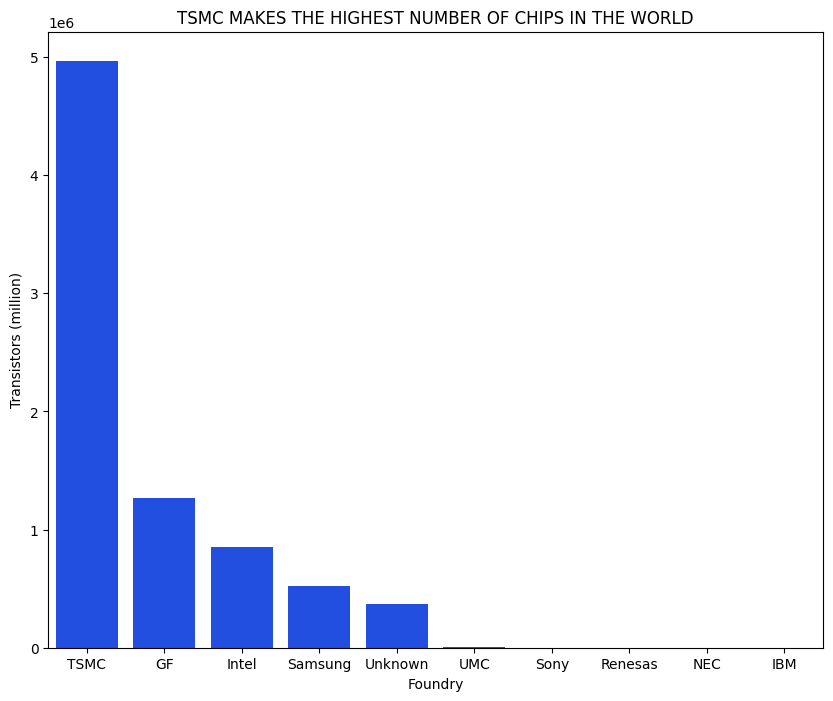

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=vendor_nums)
plt.title('TSMC makes the highest number of chips in the world'.upper())
plt.show()

In [ ]:
numerical_columns=semiconductors.select_dtypes(include='float').columns

In [ ]:
corr_df=semiconductors[numerical_columns].corr()

In [ ]:
corr_df

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
Process Size (nm),1.000000,-0.163532,-0.231792,-0.411004,-0.280578,-0.350841,-0.465691,-0.215471
TDP (W),-0.163532,1.000000,0.680525,0.476843,0.097157,0.649048,0.516988,0.392487
Die Size (mm^2),-0.231792,0.680525,1.000000,0.640871,0.012857,0.692151,0.653029,0.558416
Transistors (million),-0.411004,0.476843,0.640871,1.000000,0.017595,0.810190,0.862262,0.684729
Freq (MHz),-0.280578,0.097157,0.012857,0.017595,1.000000,0.271311,0.578159,0.188543
FP16 GFLOPS,-0.350841,0.649048,0.692151,0.810190,0.271311,1.000000,0.728674,0.683008
FP32 GFLOPS,-0.465691,0.516988,0.653029,0.862262,0.578159,0.728674,1.000000,0.519611
FP64 GFLOPS,-0.215471,0.392487,0.558416,0.684729,0.188543,0.683008,0.519611,1.000000


# **Calculate and visualized the correlation among the features**

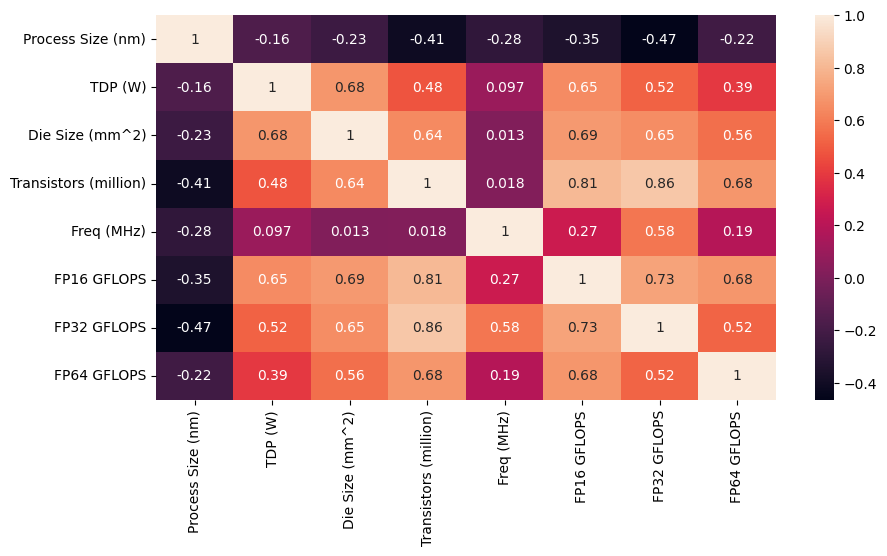

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corr_df, annot=True)
plt.show()

# Perfom the correct encoding for your data, in readiness for modelling.

In [ ]:
semiconductors['Type'].value_counts()

In [ ]:
semiconductors['Foundry'].value_counts()

In [ ]:
semiconductors['Vendor'].value_counts()

In [ ]:
#Extract categorical colums excluding those that were dropped
categorical_columns=semiconductors.select_dtypes(include='object').columns.tolist()


In [ ]:
#initializing OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(semiconductors[categorical_columns])
one_hot_df=pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
semiconductors_encoded=pd.concat([semiconductors,one_hot_df], axis=1)
semiconductors_encoded=semiconductors_encoded.drop(categorical_columns, axis=1)

In [ ]:
semiconductors_encoded

,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Type_CPU,...,Foundry_Samsung,Foundry_Sony,Foundry_TSMC,Foundry_UMC,Foundry_Unknown,Vendor_AMD,Vendor_ATI,Vendor_Intel,Vendor_NVIDIA,Vendor_Other
0,2007-02-20,65.0,45.0,77.0,122.0,2200.0,768.0,384.0,96.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2020-09-02,10.0,28.0,NaN,NaN,2600.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2011-05-03,45.0,125.0,258.0,758.0,3700.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,2011-02-22,40.0,75.0,332.0,1950.0,450.0,NaN,432.0,36.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4850,2005-06-01,90.0,7.0,NaN,NaN,250.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4851,2010-03-03,40.0,23.0,100.0,486.0,500.0,NaN,52.8,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4852,2003-03-06,150.0,NaN,65.0,29.0,250.0,NaN,NaN,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
